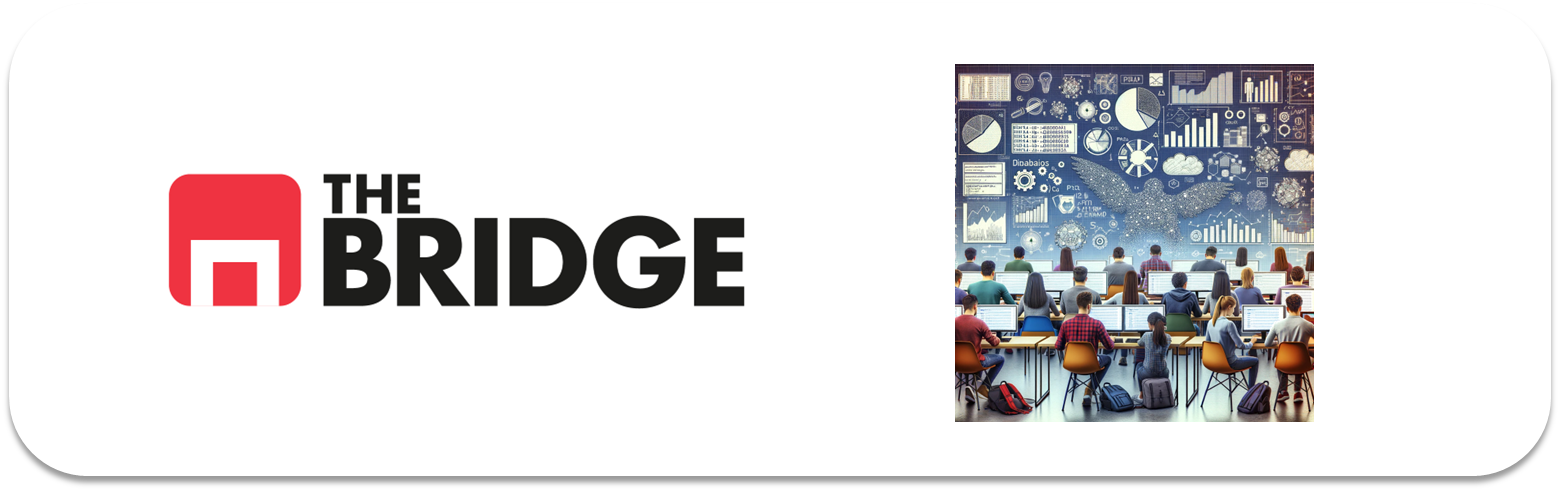

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_test, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



SOLUCION 1. Carga el dataset del Titanic.

In [42]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [43]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


SOLUCION 2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.

In [44]:
df_titanic.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [45]:
df_titanic.alive.value_counts()

alive
no     549
yes    342
Name: count, dtype: int64

Eliminamos la columna alive (string: yes or no) porque es equivalente a survived (numerica: 0 y 1)

In [46]:
df_titanic = df_titanic.drop("alive", axis = 1)

Tambien eliminamos la variable class porque es equivalente a pclass

In [47]:
df_titanic = df_titanic.drop("class", axis = 1)

Tambien eliminamos la variable embarked porque es equivalente a embark_town

In [48]:
df_titanic = df_titanic.drop("embarked", axis = 1)

Elimino la columna deck por la gran cantidad de nulos que tiene

In [49]:
df_titanic = df_titanic.drop("deck", axis = 1)

Elimino las filas con nulos en embark_town

In [50]:
#df_titanic = df_titanic[~df_titanic.embark_town.isna()]

In [51]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   who          891 non-null    object 
 8   adult_male   891 non-null    bool   
 9   embark_town  889 non-null    object 
 10  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 64.5+ KB


SOLUCION 3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.

In [55]:
target = "survived"
df_titanic[target].value_counts(True)

survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

<Axes: xlabel='survived', ylabel='count'>

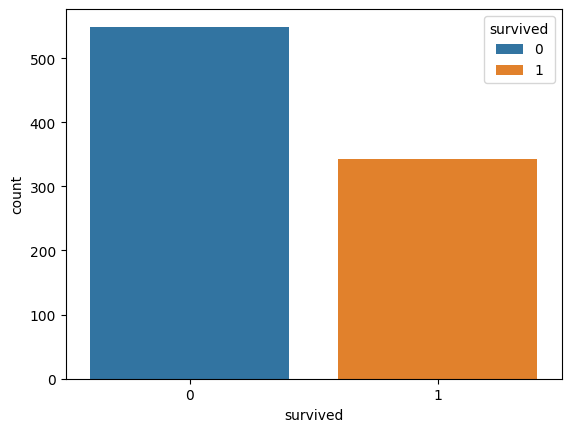

In [54]:
sns.countplot(x = target, data = df_titanic, hue = target)

Dado que la proporcion de fallecidos de nuestro dataset es mucho mayor, el modelo aprenderá mucho mejor con estos casos y acertará mas cuando necesite predecir sobre un caso de fallecimento y acertará mucho menos con los casos de supervivencia. Esto significa que habrá menos falsos positivos y más falsos negativos. La precision más alta y la sensibilidad  mas baja.

SOLUCION 4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.

In [58]:
train_set, test_set = train_test_split(df_titanic,test_size=0.20, random_state=42)

SOLUCION 5. Construye las parejas X,y de train y test

In [59]:
X_test = train_set.drop(target, axis=1)
X_test = test_set.drop(target, axis=1)
y_train = train_set[target]
y_test = test_set[target]

SOLUCION 6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.

In [60]:
X_test.groupby([df_titanic.who])["age"].mean()

who
child     5.997681
man      33.175758
woman    31.858382
Name: age, dtype: float64

In [74]:
X_train.groupby([X_train.who,X_test.pclass])["age"].mean().reset_index()

,who,pclass,age
0,child,1,7.184000
1,child,2,4.156250
2,child,3,6.487917
3,man,1,41.587838
4,man,2,33.893333
5,man,3,29.439227
6,woman,1,36.015625
7,woman,2,31.990000
8,woman,3,27.237288


In [73]:
X_test["age_mean"] = X_train.groupby([X_train.who,X_train.pclass])["age"].transform("mean")
X_train

,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone,age_mean
331,1,male,45.5,0,0,28.5000,man,True,Southampton,True,41.587838
733,2,male,23.0,0,0,13.0000,man,True,Southampton,True,33.893333
382,3,male,32.0,0,0,7.9250,man,True,Southampton,True,29.439227
704,3,male,26.0,1,0,7.8542,man,True,Southampton,False,29.439227
813,3,female,6.0,4,2,31.2750,child,False,Southampton,False,6.487917
...,...,...,...,...,...,...,...,...,...,...,...
106,3,female,21.0,0,0,7.6500,woman,False,Southampton,True,27.237288
270,1,male,NaN,0,0,31.0000,man,True,Southampton,True,41.587838
860,3,male,41.0,2,0,14.1083,man,True,Southampton,False,29.439227
435,1,female,14.0,1,2,120.0000,child,False,Southampton,False,7.184000


In [77]:
X_train["age_filled"] = X_train.age

In [81]:
X_train.loc[X_train.age_filled.isna(), "age_filled"] = X_train.age_mean

Aunque el puerto de embarque que mas se repite es Southhampton. Para se mas precisos al asignar un valor de relleno deberíamos mirar los casos de filas nulas. Vemos que pertenecen a mujeres de primera clase que viajaron solas. Al agrupar por persona, clase y acompañamiento vemos que le correspondería Cherbourg.

In [86]:
X_train[X_train.embark_town.isna()]

,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone,age_mean,age_filled
829,1,female,62.0,0,0,80.0,woman,False,NaN,True,36.015625,62.0
61,1,female,38.0,0,0,80.0,woman,False,NaN,True,36.015625,38.0


In [88]:
X_train.groupby([X_train.who,X_train.pclass,X_train.alone])["embark_town"].agg(pd.Series.mode)

who    pclass  alone
child  1       False    Southampton
       2       False    Southampton
       3       False    Southampton
               True       Cherbourg
man    1       False    Southampton
               True     Southampton
       2       False    Southampton
               True     Southampton
       3       False    Southampton
               True     Southampton
woman  1       False    Southampton
               True       Cherbourg
       2       False    Southampton
               True     Southampton
       3       False    Southampton
               True     Southampton
Name: embark_town, dtype: object

In [93]:
X_train.loc[X_train.embark_town.isna(), "embark_town"] = "Cherbourg"

In [98]:
X_test.drop("age", axis=1, inplace=True)
X_test.drop("age_mean", axis=1, inplace=True)


SOLUCION 7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué

array([[<Axes: title={'center': 'pclass'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>],
       [<Axes: title={'center': 'age_filled'}>, <Axes: >]], dtype=object)

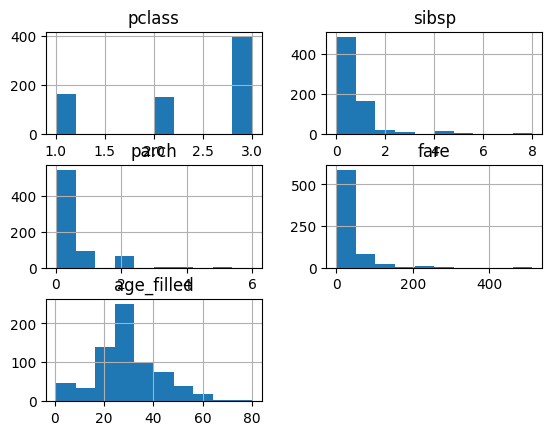

In [100]:
X_train.hist()

In [113]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       712 non-null    int64  
 1   sex          712 non-null    object 
 2   sibsp        712 non-null    int64  
 3   parch        712 non-null    int64  
 4   fare         712 non-null    float64
 5   who          712 non-null    object 
 6   adult_male   712 non-null    bool   
 7   embark_town  712 non-null    object 
 8   alone        712 non-null    bool   
 9   age_filled   712 non-null    float64
dtypes: bool(2), float64(2), int64(3), object(3)
memory usage: 67.6+ KB


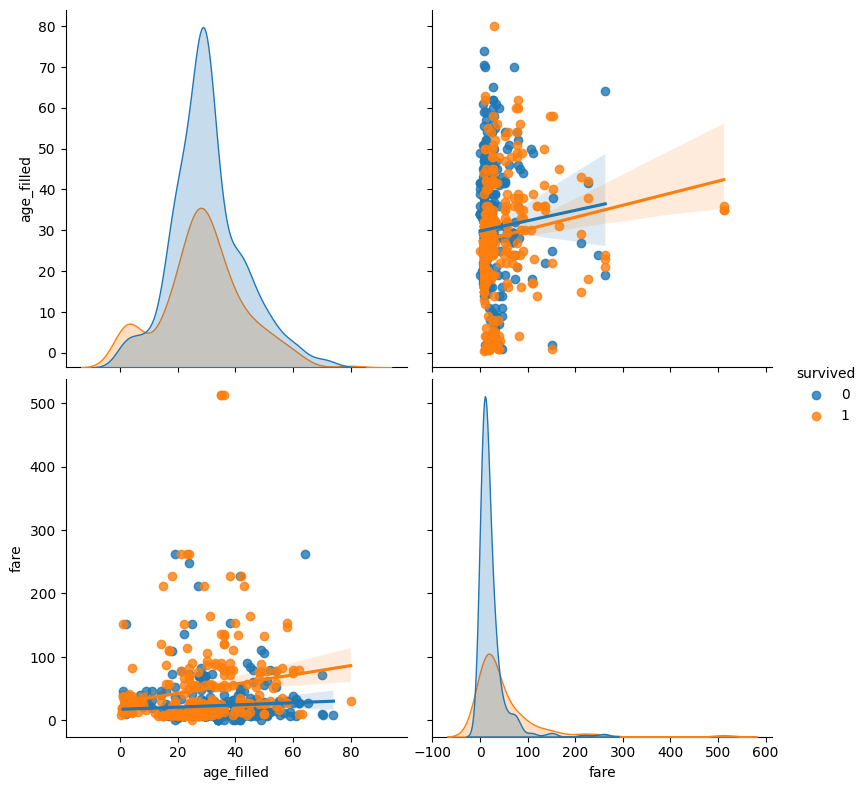

In [112]:
sns.pairplot(pd.concat((X_train,y_train), axis=1),
            hue='survived',
            height=4,
            vars=["age_filled","fare"],
            kind='reg'); # "reg" de regresión lineal

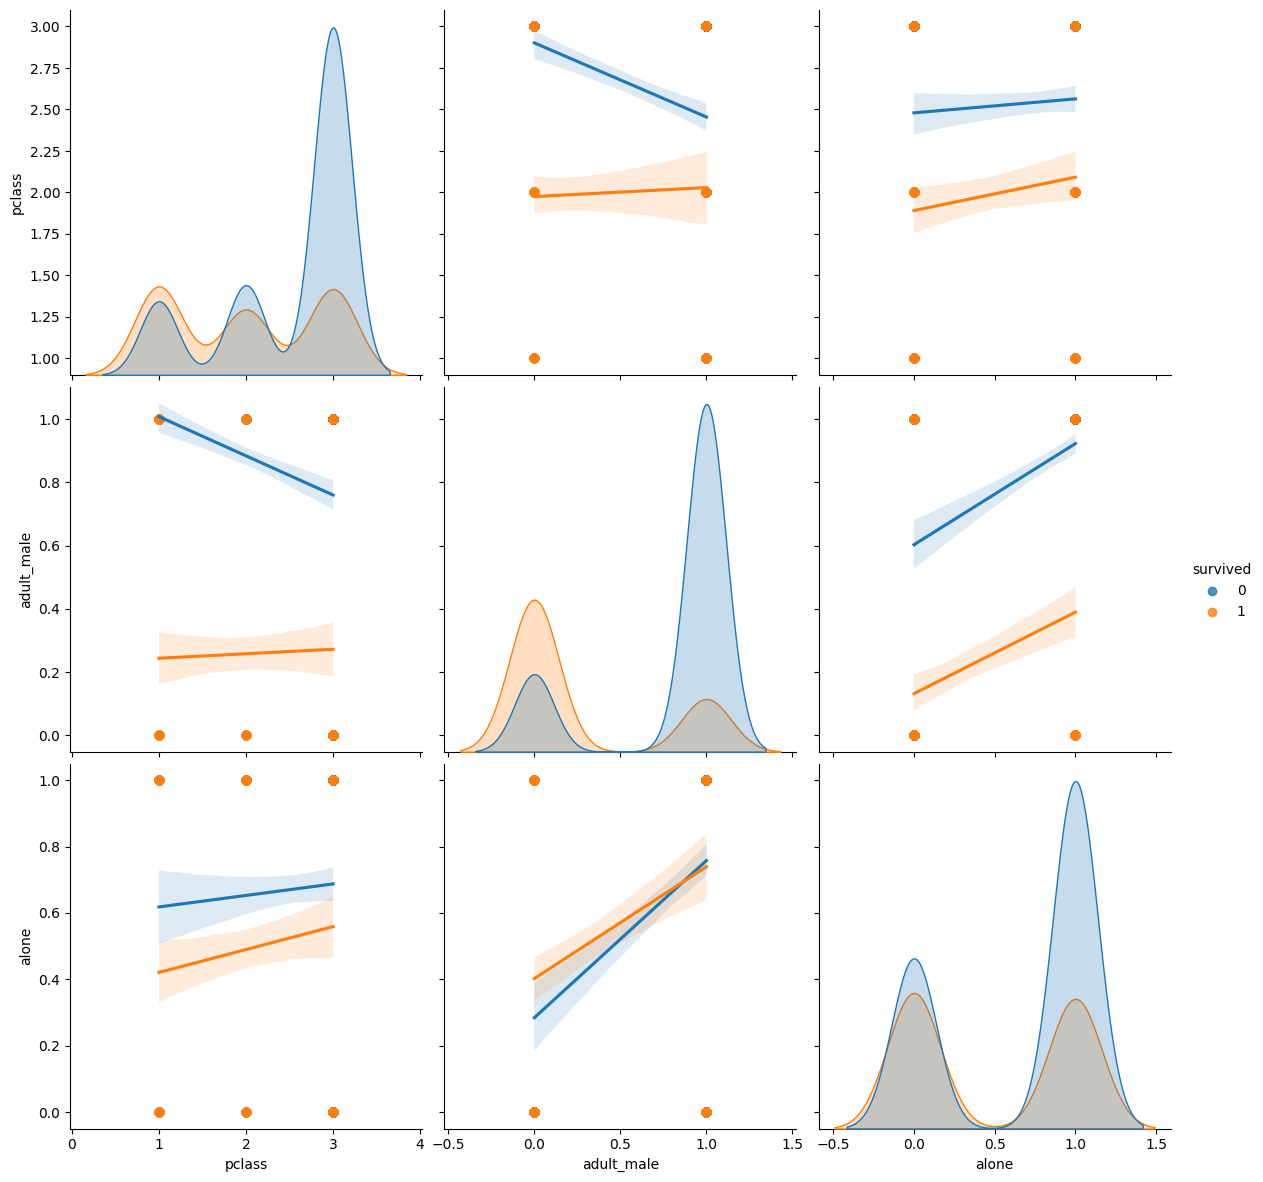

In [118]:
sns.pairplot(pd.concat((X_train,y_train), axis=1),
            hue='survived',
            height=4,
            vars=["pclass","adult_male","alone"],
            kind='reg'); # "reg" de regresión lineal

SOLUCION 8: Trata las variables para que funcionen lo mejor posible en el modelo.

In [124]:
X_train

,pclass,sex,sibsp,parch,fare,who,adult_male,embark_town,alone,age_filled
331,1,male,0,0,28.5000,man,True,Southampton,True,45.500000
733,2,male,0,0,13.0000,man,True,Southampton,True,23.000000
382,3,male,0,0,7.9250,man,True,Southampton,True,32.000000
704,3,male,1,0,7.8542,man,True,Southampton,False,26.000000
813,3,female,4,2,31.2750,child,False,Southampton,False,6.000000
...,...,...,...,...,...,...,...,...,...,...
106,3,female,0,0,7.6500,woman,False,Southampton,True,21.000000
270,1,male,0,0,31.0000,man,True,Southampton,True,41.587838
860,3,male,2,0,14.1083,man,True,Southampton,False,41.000000
435,1,female,1,2,120.0000,child,False,Southampton,False,14.000000


Pasamos variables binarias a enteros

In [130]:
X_train['sex'] = X_train['sex'].astype(str).replace("male", 1).replace("female", 0).astype(int)

C:\Users\jose\AppData\Local\Temp\ipykernel_3540\3969822836.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train['sex'] = X_train['sex'].astype(str).replace("male", 1).replace("female", 0).astype(int)


In [134]:
X_train["adult_male"] = X_train.adult_male.astype(int)

In [136]:
X_train["alone"] = X_train.alone.astype(int)

In [141]:
X_train = pd.get_dummies(X_train, columns = ["who","embark_town"], dtype= "int") 

In [144]:
X_train = pd.get_dummies(X_train, columns = ["pclass"], dtype= "int") 

In [157]:
X_train

,sex,sibsp,parch,fare,adult_male,alone,age_filled,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,pclass_1,pclass_2,pclass_3
331,1,0,0,28.5000,1,1,45.500000,0,1,0,0,0,1,1,0,0
733,1,0,0,13.0000,1,1,23.000000,0,1,0,0,0,1,0,1,0
382,1,0,0,7.9250,1,1,32.000000,0,1,0,0,0,1,0,0,1
704,1,1,0,7.8542,1,0,26.000000,0,1,0,0,0,1,0,0,1
813,0,4,2,31.2750,0,0,6.000000,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,0,0,7.6500,0,1,21.000000,0,0,1,0,0,1,0,0,1
270,1,0,0,31.0000,1,1,41.587838,0,1,0,0,0,1,1,0,0
860,1,2,0,14.1083,1,0,41.000000,0,1,0,0,0,1,0,0,1
435,0,1,2,120.0000,0,0,14.000000,1,0,0,0,0,1,1,0,0


Cambio la escala de las variables numericas

In [158]:
from sklearn.preprocessing import StandardScaler

features = ["sibsp","parch","fare","age_filled"]
scaler = StandardScaler()
scaler.fit(X_train[features]) # Adaptamos el StandarScaler al Train, pero luego usamos el mismo en el test (porque ya la media y la desviación son las del train)
X_train = pd.DataFrame(scaler.transform(X_train[features]), columns = features)
X_train.describe()

,sibsp,parch,fare,age_filled
count,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02
mean,1.746418e-17,2.245395e-17,5.363999e-17,2.345190e-16
std,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00
min,-4.707224e-01,-4.793416e-01,-6.274674e-01,-2.232705e+00
25%,-4.707224e-01,-4.793416e-01,-4.748670e-01,-5.905208e-01
50%,-4.707224e-01,-4.793416e-01,-3.491435e-01,-2.441410e-02
75%,3.799232e-01,-4.793416e-01,-4.017244e-02,4.748445e-01
max,6.334442e+00,7.104908e+00,9.237724e+00,3.823135e+00


SOLUCION 9 .Construye un modelo de regresión logística.

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

SOLUCION 11. Procesa el dataset de Test para que puedas usarlo en la evaluación 

In [160]:
X_test.groupby([X_test.who])["age"].mean()


who
child     8.202143
man      33.162651
woman    32.544444
Name: age, dtype: float64

In [161]:
X_test.groupby([X_test.who,X_test.pclass])["age"].mean().reset_index()


,who,pclass,age
0,child,1,11.000000
1,child,2,6.610000
2,child,3,8.400000
3,man,1,44.833333
4,man,2,32.066667
5,man,3,27.170455
6,woman,1,33.666667
7,woman,2,32.857143
8,woman,3,30.653846


In [162]:

X_test["age_mean"] = X_test.groupby([X_test.who,X_test.pclass])["age"].transform("mean")
X_test

,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone,age_mean
709,3,male,NaN,1,1,15.2458,man,True,Cherbourg,False,27.170455
439,2,male,31.0,0,0,10.5000,man,True,Southampton,True,32.066667
840,3,male,20.0,0,0,7.9250,man,True,Southampton,True,27.170455
720,2,female,6.0,0,1,33.0000,child,False,Southampton,False,6.610000
39,3,female,14.0,1,0,11.2417,child,False,Cherbourg,False,8.400000
...,...,...,...,...,...,...,...,...,...,...,...
433,3,male,17.0,0,0,7.1250,man,True,Southampton,True,27.170455
773,3,male,NaN,0,0,7.2250,man,True,Cherbourg,True,27.170455
25,3,female,38.0,1,5,31.3875,woman,False,Southampton,False,30.653846
84,2,female,17.0,0,0,10.5000,woman,False,Southampton,True,32.857143


In [165]:
X_test["age_filled"] = X_test.age


In [166]:
X_test.loc[X_test.age_filled.isna(), "age_filled"] = X_test.age_mean

In [167]:
X_test.drop("age", axis=1, inplace=True)
X_test.drop("age_mean", axis=1, inplace=True)

In [168]:
X_test[X_test.embark_town.isna()]

,pclass,sex,sibsp,parch,fare,who,adult_male,embark_town,alone,age_filled


In [ ]:
X_test.groupby([X_test.who,X_test.pclass,X_test.alone])["embark_town"].agg(pd.Series.mode)
X_test.loc[X_test.embark_town.isna(), "embark_town"] = "Cherbourg"

In [169]:

X_test['sex'] = X_test['sex'].astype(str).replace("male", 1).replace("female", 0).astype(int)
X_test["adult_male"] = X_test.adult_male.astype(int)
X_test["alone"] = X_test.alone.astype(int)
X_test = pd.get_dummies(X_test, columns = ["who","embark_town"], dtype= "int") 
X_test = pd.get_dummies(X_test, columns = ["pclass"], dtype= "int") 




C:\Users\jose\AppData\Local\Temp\ipykernel_3540\4157575074.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test['sex'] = X_test['sex'].astype(str).replace("male", 1).replace("female", 0).astype(int)


In [170]:
features = ["sibsp","parch","fare","age_filled"]
scaler = StandardScaler()
scaler.fit(X_test[features]) # Adaptamos el StandarScaler al Train, pero luego usamos el mismo en el test (porque ya la media y la desviación son las del train)
X_test = pd.DataFrame(scaler.transform(X_test[features]), columns = features)
X_test.describe()

,sibsp,parch,fare,age_filled
count,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02
mean,1.984756e-17,2.480945e-17,1.389329e-16,-9.923781e-18
std,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00
min,-5.520200e-01,-4.543156e-01,-7.800334e-01,-2.251601e+00
25%,-5.520200e-01,-4.543156e-01,-5.793134e-01,-6.521304e-01
50%,-5.520200e-01,-4.543156e-01,-4.114273e-01,-1.232548e-01
75%,8.203630e-01,-4.543156e-01,4.387498e-02,4.811745e-01
max,4.937512e+00,5.354434e+00,5.889831e+00,3.049999e+00


SOLUCION Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.

In [171]:
pred_train = log_reg.predict(X_train)
pred_test = log_reg.predict(X_test)

Para Train

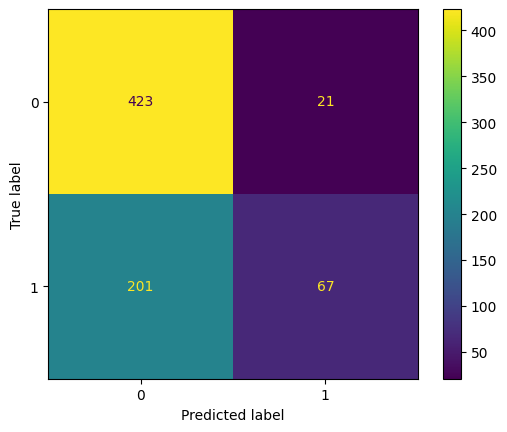

In [172]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_train,pred_train)

In [173]:
report = classification_report(y_train, pred_train)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.95      0.79       444
           1       0.76      0.25      0.38       268

    accuracy                           0.69       712
   macro avg       0.72      0.60      0.58       712
weighted avg       0.71      0.69      0.64       712



Para test

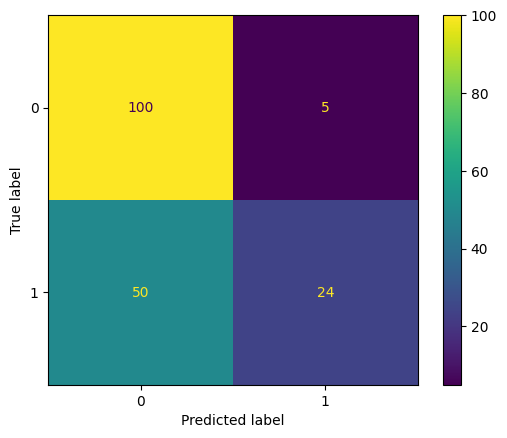

In [175]:
ConfusionMatrixDisplay.from_predictions(y_test,pred_test)

In [176]:
report = classification_report(y_test, pred_test)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.95      0.78       105
           1       0.83      0.32      0.47        74

    accuracy                           0.69       179
   macro avg       0.75      0.64      0.63       179
weighted avg       0.73      0.69      0.65       179

